# extracting timeseries from each subject using Neurosynth based masks (of hippocampus, amygdala and vmPFC)

In [1]:
import pandas as pd 
from nilearn.input_data import NiftiMapsMasker
from nilearn import connectome
from nilearn import datasets
import numpy as np
import nilearn.plotting
import os
import glob
import nilearn
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

/gpfs/ysm/project/joormann/oad4/conda_envs/naturalistic/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
output_dir = '/gpfs/gibbs/pi/levy_ifat/Or/RV_FC'

In [4]:
# grab amygdala mask
## Amygdala as mask
mask_file = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/amygdala_association-test_z_FDR_0.01.nii.gz'
mask_file = nilearn.image.math_img("a>=27", a=mask_file)

#mask_file =nilearn.image.binarize_img(mask_file, threshold=27)
nilearn.plotting.plot_roi(mask_file, draw_cross=False)
# saving fig
#plt.savefig('amygdalaMask.eps', format='eps', dpi=300)
plt.savefig('amygdalaMask.png', dpi=300)
maskerAmg = nilearn.input_data.NiftiMasker(mask_img=mask_file, 
                                smoothing_fwhm=None,
                                        standardize=True, detrend=False, verbose=5)

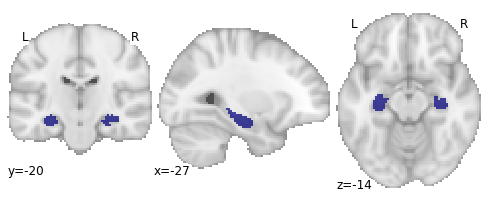

In [5]:
# grab hippocampus mask
mask_fileH = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/hippocampus_association-test_z_FDR_0.01.nii.gz'
mask_fileH = nilearn.image.math_img("a>=16", a=mask_fileH)
#mask_fileH = nilearn.image.binarize_img(mask_fileH, 16)
%matplotlib inline
nilearn.plotting.plot_roi(mask_fileH, draw_cross=False)
#plt.savefig('HippocampusMask.eps', format='eps', dpi=300)
plt.savefig('HippocampusMask.png', dpi=300)
maskerH = nilearn.input_data.NiftiMasker(mask_img=mask_fileH, 
                                smoothing_fwhm=None,
                                        standardize=True, detrend=False, verbose=5)

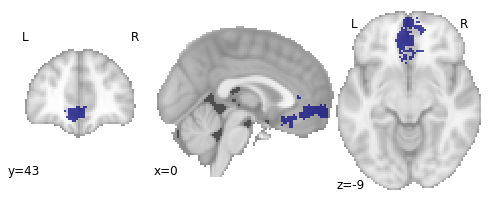

In [6]:
# grab vmPFC mask
# now lets do the same with vmPFC
mask_fileV = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/vmpfc_association-test_z_FDR_0.01.nii.gz'
mask_fileV = nilearn.image.math_img("a>=7", a=mask_fileV)
#mask_fileV = nilearn.image.binarize_img(mask_fileV, 7)
nilearn.plotting.plot_roi(mask_fileV, draw_cross=False)
#plt.savefig('vmPFCMask.eps', format='eps', dpi=300)
plt.savefig('vmPFCMask.png',dpi=300)
maskerV = nilearn.input_data.NiftiMasker(mask_img=mask_fileV, 
                                smoothing_fwhm=None,
                                        standardize=True, detrend=False, verbose=5)

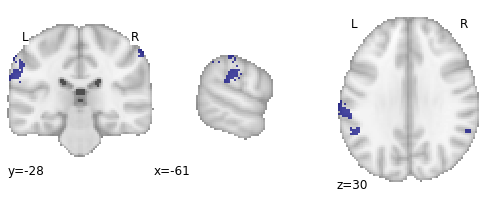

In [14]:
# grab supramarginal

mask_fileSM = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/supramarginal gyrus_association-test_z_FDR_0.01.nii.gz'
mask_fileSM = nilearn.image.math_img("a>=5", a=mask_fileSM)

nilearn.plotting.plot_roi(mask_fileSM, draw_cross=False)
#plt.savefig('vmPFCMask.eps', format='eps', dpi=300)
plt.savefig('SMask.png',dpi=300)
maskerSM = nilearn.input_data.NiftiMasker(mask_img=mask_fileSM, 
                                smoothing_fwhm=None,
                                        standardize=True, detrend=False, verbose=5)

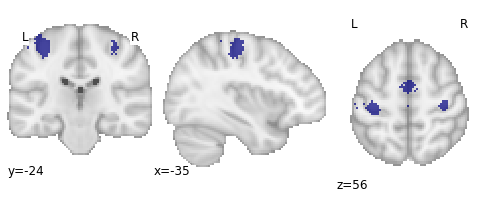

In [12]:
# grab sensorimotor cortex mask
%matplotlib inline
mask_fileSnM = '/gpfs/gibbs/pi/levy_ifat/Or/ROI/primary sensorimotor_association-test_z_FDR_0.01.nii.gz'
mask_fileSnM = nilearn.image.math_img("a>=7", a=mask_fileSnM)

#mask_file =nilearn.image.binarize_img(mask_file, threshold=27)
nilearn.plotting.plot_roi(mask_fileSnM, draw_cross=False)
# saving fig

plt.savefig('sensoryMotorMask.png', dpi=300)
maskerSnM = nilearn.input_data.NiftiMasker(mask_img=mask_fileSnM, 
                                smoothing_fwhm=None,
                                        standardize=True, detrend=False, verbose=5)

In [8]:
func_files = glob.glob(os.path.join(output_dir,'sub-*_ses-1_denoise_smooth6mm_task-*bold.nii.gz'))
len(func_files)

113

In [8]:
amg = maskerAmg.fit_transform(func_files[0])
#amgM = amg.mean(axis=1) # average all voxels

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/gpfs/gibbs/pi/levy_ifat/Or/RV_FC/sub-024_ses-1_denoise_smooth6mm_task-RV_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


In [9]:
amg.shape

(552, 429)

In [34]:
hipp = maskerH.fit_transform(func_files[0])
hippM = hipp.mean(axis=1)
vmpfc = maskerV.fit_transform(func_files[0])
vmpfcM = vmpfc.mean(axis=1)

[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/gpfs/gibbs/pi/levy_ifat/Or/RV_FC/sub-024_ses-1_denoise_smooth6mm_task-RV_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/gpfs/gibbs/pi/levy_ifat/Or/RV_FC/sub-024_ses-1_denoise_smooth6mm_task-RV_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


In [36]:
subDF = pd.DataFrame({'sub': 'sub-024', 'amg': amgM, 'hipp':hippM, 'vmpfc':vmpfcM})
subDF

,sub,amg,hipp,vmpfc
0,sub-024,-7.733968e-11,3.778252e-10,4.297055e-10
1,sub-024,-1.224553e+00,-1.297589e+00,-1.624571e+00
2,sub-024,-5.395329e-01,-2.442616e-01,4.260426e-02
3,sub-024,1.218958e+00,9.387680e-01,7.145287e-01
4,sub-024,1.487926e+00,1.432207e+00,8.141843e-01
...,...,...,...,...
547,sub-024,-3.563128e-01,-5.108814e-01,-7.241579e-01
548,sub-024,-1.889672e-01,-1.018203e+00,-9.309729e-01
549,sub-024,-1.383074e-01,-3.949516e-01,-3.576481e-01
550,sub-024,4.732489e-01,5.702078e-02,6.219544e-01


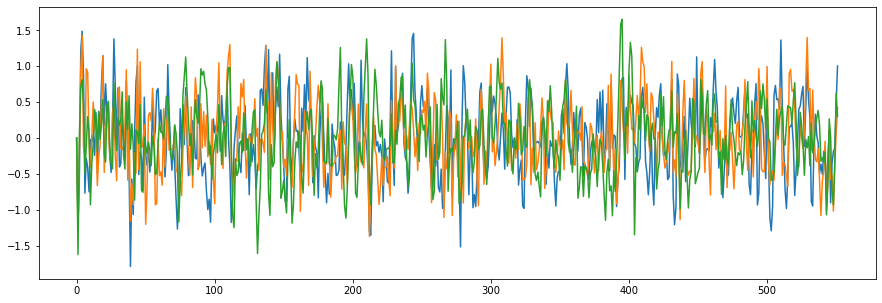

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
plt.plot(subDF.amg)
plt.plot(subDF.hipp)
plt.plot(subDF.vmpfc)

In [45]:
os.path.basename(func_files[0]).split('_')[0]

'sub-024'

In [52]:
subDF.to_csv(f'timeseries/amg_hipp_vmpfc_sub-024.csv', index=False)

In [13]:
# run on all subjects and save csv files
# first define function that takes all three masks and return data frame
def masking(funcFile):
    sub = os.path.basename(funcFile).split('_')[0]
    # takes functional file and returns Pandas dataframe for average timeseries of each of these ROIs
    #amg = maskerAmg.fit_transform(funcFile)
    #amgM = amg.mean(axis=1) # average all voxels
    #hipp = maskerH.fit_transform(funcFile)
    #hippM = hipp.mean(axis=1)
    #vmpfc = maskerV.fit_transform(funcFile)
    #vmpfcM = vmpfc.mean(axis=1)
    #acc = maskerSM.fit_transform(funcFile)
    #accM = acc.mean(axis=1)
    sensoriMorot = maskerSnM.fit_transform(funcFile)
    snmM = sensoriMorot.mean(axis=1)
    
    #subDF = pd.DataFrame({'sub': sub, 'amg': amgM, 'hipp':hippM, 'vmpfc':vmpfcM, 'ACC':accM})
    subDF = pd.DataFrame({'sub': sub,  'sensoryMotor':snmM})
    # save it
    subDF.to_csv(f'timeseries/sensoryMotot_{sub}.csv', index=False)
    return subDF

In [14]:
results = Parallel(n_jobs=10)(delayed(masking)(funcFile) for funcFile in func_files)
#print(results)